### Aim: Implementation of Decision Tree Using ID3,C4.5,Gini And Naïve Bayes Classifier

Decision Tree:

In simple words, a decision tree is a structure that contains nodes (rectangular boxes) and edges(arrows) and is built from a dataset (table of columns representing features/attributes and rows corresponding to records). Each node is either used to make a decision (known as decision node) or represent an outcome (known as leaf node).

ID3:

ID3 stands for Iterative Dichotomiser 3 and is named such because the algorithm
iteratively (repeatedly) dichotomizes(divides) features into two or more groups at each step. Invented by Ross Quinlan, ID3 uses a top-down greedy approach to build a decision tree. In simple words, the top-down approach means that we start building the tree from the top and the greedy approach means that at each iteration we select the best feature at the present moment to create a node. Most generally ID3 is only used for classification problems with nominal features only.

C4.5:

C4.5 is a decision tree algorithm that was developed by Ross Quinlan. It is an extension of the ID3 (Iterative Dichotomiser 3) algorithm and is commonly used for classification tasks. C4.5 incorporates several enhancements over ID3, including the ability to handle continuous and discrete attribute types, handling missing attribute values, and pruning to reduce overfitting.

Gini:

In the context of a decision tree, the Gini index (also known as Gini impurity or Gini coefficient) is a measure of impurity or the degree of uniformity in a set of data. It is commonly used as a criterion to evaluate the quality of a split at each node in a decision tree algorithm.

The Gini index is calculated based on the probability of misclassifying a randomly chosen element from the dataset if it were randomly labeled according to the class distribution in the node. In other words, it measures the probability of two randomly chosen elements being incorrectly labeled if they are randomly assigned a class label according to the distribution in the node.

Naive Bayes:
Naive Bayes classifiers are a collection of classification algorithms based on Bayes’ Theorem. It is not a single algorithm but a family of algorithms where all of them share a common principle, i.e., every pair of features being classified is independent of each other. Bayes’ Theorem finds the probability of an event occurring given the probability of another event that has already occurred.
 Bayes’ theorem is stated mathematically as the following equation:
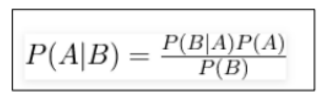.


where A and B are events and P(B) ≠ 0.
● Basically, we are trying to find the probability of event A, given the event B is
true.
Event B is also termed as evidence.
● P(A) is the priori of A (the prior probability, i.e., Probability of event before
evidence is seen). The evidence is an attribute value of an unknown instance
(here, it is event B).
● P(A|B) is a posteriori probability of B, i.e., probability of event after evidence is
seen.

In [ ]:
import numpy as np #linear algebra
import pandas as pd #data processing
from sklearn.preprocessing import LabelEncoder #if data isstring then use it to preprocess the data
from sklearn.tree import DecisionTreeClassifier

In [ ]:
sunny_df = pd.read_csv('/content/glass.csv')
sunny_df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [ ]:
#Extracting Features
X = sunny_df.iloc[:,:-1]
y = sunny_df.iloc[:,9]

In [ ]:
#making Model
sunny_dt = DecisionTreeClassifier(criterion = "entropy")
sunny_dt

DecisionTreeClassifier(criterion='entropy')

In [ ]:
#Splitting the dataset into training, testing and predicting values:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
sunny_dt.fit(X_train, y_train)
y_pred = sunny_dt.predict(X_test)
y_pred

array([7, 1, 1, 6, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 7, 3, 2, 3, 2, 5, 1,
       7, 7, 1, 1, 7, 1, 1, 2, 1, 3, 2, 2, 1, 1, 1, 3, 1, 7, 2, 6, 2, 1,
       2, 1, 1, 2, 1, 2, 1, 6, 7, 1, 1, 2, 1, 2, 1, 3, 1, 1, 1, 7, 1])

In [ ]:
#Making Confusion Matrix
from sklearn.metrics import confusion_matrix
sunny_cm = confusion_matrix(y_test, y_pred)
print(sunny_cm)

[[16  4  1  0  0  0]
 [10 13  1  0  1  1]
 [ 2  2  3  0  0  0]
 [ 0  1  0  1  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  7]]


In [ ]:
#finding accuracy from the confusion matrix.
a = sunny_cm.shape
corrPred = 0
falsePred = 0
for row in range(a[0]):
  for c in range(a[1]):
    if row == c:
      corrPred +=sunny_cm[row,c]
    else:
      falsePred += sunny_cm[row,c]
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
print ('\n\nAccuracy of the ID3 is: ', corrPred/(
sunny_cm.sum()))

Correct predictions:  42
False predictions 23


Accuracy of the ID3 is:  0.6461538461538462


### B] C4.5:

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

Reading the dataset:

In [ ]:
sunny_iris = load_iris()

Splitting dataset into training, testing and predicting values:

In [ ]:
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
decision_tree = decision_tree.fit(sunny_iris.data, sunny_iris.target)

Predicting values:

In [ ]:
r = export_text(decision_tree, feature_names=sunny_iris['feature_names'])
print(r)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- class: 1
|   |--- petal width (cm) >  1.75
|   |   |--- class: 2



### C. Naive Bayes

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.datasets import load_iris
sunny_iris = load_iris()

#### store the feature matrix (X) and response vector (y)

In [ ]:
X = sunny_iris.data
y = sunny_iris.target

In [ ]:
sunny_dataset = pd.read_csv('/content/golf.csv')

In [ ]:
sunny_dataset.head()

,Outlook,Temp,Humidity,Windy,Play Golf
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes


Splitting the data:

In [ ]:
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

Preparing the Data:

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Fitting Naïve Bayes Classification:

In [ ]:
# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

Predicting Data Set:

In [ ]:
# making predictions on the testing set
y_pred = gnb.predict(X_test)
print(y_pred)

[0 1 1 0 2 2 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 2 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 1 2 1 2 0 0 0 1 0 0 2 2 2 2 2 1 2 1]


Compare The data:

In [ ]:
# comparing actual response values (y_test) with predicted response values (y_pred)
y_compare = np.vstack((y_test,y_pred)).T
y_compare[:5,:]

array([[0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [2, 2]])

10.Making Confusion matrix:

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[19  0  0]
 [ 0 19  2]
 [ 0  1 19]]


In [ ]:
#finding accuracy from the confusion matrix.
a = cm.shape
corrPred = 0
falsePred = 0
for row in range(a[0]):
  for c in range(a[1]):
    if row == c:
      corrPred +=cm[row,c]
    else:
      falsePred += cm[row,c]
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
print ('\n\nAccuracy of the Naive Bayes Clasification is: ',
corrPred/(cm.sum()))

Correct predictions:  57
False predictions 3


Accuracy of the Naive Bayes Clasification is:  0.95


CONCLUSION:

We have learnt and implemented decision tree using ID3, C4.5 and Naïve Bayes
Classification in this practical.